In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import pickle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac


In [3]:
df = pd.read_csv("bankruptcy-prevention.csv",sep = ";") 


In [4]:
df.columns = ["Indstrial_Risk","Management_Risk","Financial_Flexibility","Credibility","Competitive","Operating_Risk","Class"]

In [5]:
df.head()

,Indstrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitive,Operating_Risk,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [6]:
df.tail()

,Indstrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitive,Operating_Risk,Class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [7]:
df.isna().sum()

Indstrial_Risk           0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitive              0
Operating_Risk           0
Class                    0
dtype: int64

In [8]:
df.describe()

,Indstrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitive,Operating_Risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df["Class"]=preprocessing.LabelEncoder().fit_transform(df["Class"])

In [10]:
df

,Indstrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitive,Operating_Risk,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [12]:
df[df.duplicated()]  # duplicated values cannot be removed because data will become weak

,Indstrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitive,Operating_Risk,Class
11,0.0,1.0,0.0,0.0,0.0,1.0,0
13,1.0,1.0,0.0,0.0,0.0,1.0,0
15,0.5,1.0,0.0,0.0,0.0,0.5,0
16,0.5,1.0,0.0,0.0,0.0,0.5,0
18,0.5,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [13]:
df["Class"].describe()

count    250.000000
mean       0.572000
std        0.495781
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

Text(0.5, 1.0, 'Financial_Flexibility')

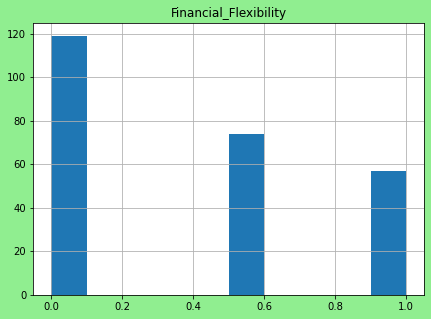

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
# histogram of Class
plt.figure(figsize = (7,5),facecolor = "lightgreen")
df["Financial_Flexibility"].hist()
plt.title("Financial_Flexibility")

<AxesSubplot:>

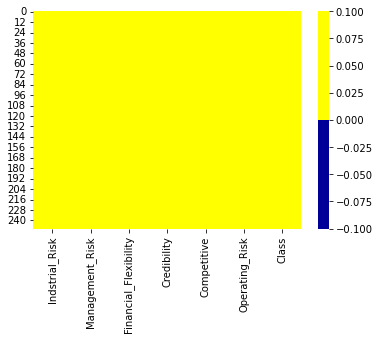

In [97]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

In [98]:
df[df.columns[0:]].corr()['Class'][:] 

Indstrial_Risk          -0.227823
Management_Risk         -0.370838
Financial_Flexibility    0.751020
Credibility              0.755909
Competitive              0.899452
Operating_Risk          -0.279786
Class                    1.000000
Name: Class, dtype: float64

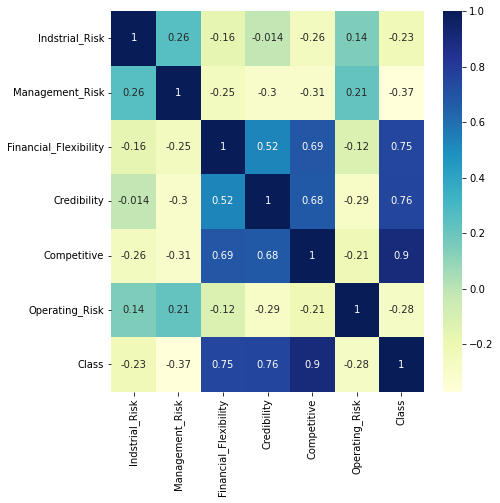

In [99]:
plt.figure(figsize=(7,7))
# plotting correlation heatmap
dfplot=sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [100]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [101]:
chi2_selector = SelectKBest(chi2, k=2)
x = df.iloc[:,:6]
y = df.iloc[:,-1]
X_kbest = chi2_selector.fit_transform(x, y)
print(X_kbest)

[[0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.5 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.5]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.5 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.5]
 [0.  0.5]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.5 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]

In [102]:
from sklearn.feature_selection import chi2
chi_scores = chi2(x,y)

In [103]:
chi_scores

(array([ 4.22529844,  9.40719007, 60.23724218, 52.30725081, 82.1862519 ,
         6.4581291 ]),
 array([3.98256148e-02, 2.16136200e-03, 8.40860779e-15, 4.74618793e-13,
        1.23848345e-19, 1.10445872e-02]))

In [104]:
raw_data = {"Features": ["Indstrial_Risk","Management_Risk","Financial_Flexibility","Credibility","Competitive","Operating_Risk"],
            "Corr_Score": [-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786],
            "Chi_Score" :[ 4.22529844,  9.40719007, 60.23724218, 52.30725081, 82.1862519,6.4581291]}
dataframe = pd.DataFrame(raw_data,columns =["Features","Corr_Score","Chi_Score"])

In [105]:
dataframe

,Features,Corr_Score,Chi_Score
0,Indstrial_Risk,-0.227823,4.225298
1,Management_Risk,-0.370838,9.407190
2,Financial_Flexibility,0.751020,60.237242
3,Credibility,0.755909,52.307251
4,Competitive,0.899452,82.186252
5,Operating_Risk,-0.279786,6.458129


In [106]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 


In [107]:
pca = PCA(3)
pca_values = pca.fit_transform(df.iloc[:,:6])

In [108]:
pca_values.shape

(250, 3)

In [109]:
finalDf = pd.DataFrame()
finalDf["PC1"] = pca_values[:,0]
finalDf["PC2"] = pca_values[:,1]
finalDf["PC3"] = pca_values[:,2]
finalDf["Class"] = df["Class"]

In [110]:
finalDf

,PC1,PC2,PC3,Class
0,-0.776282,-0.251601,0.097381,0
1,-0.809888,-0.259465,-0.560320,0
2,-0.693722,-0.052835,-0.106603,0
3,-0.344739,-0.208961,-0.282620,0
4,-1.018241,0.318703,0.046195,0
...,...,...,...,...
245,0.707823,0.531912,-0.590856,1
246,0.547859,0.398323,0.806376,1
247,0.451710,-0.276899,0.051467,1
248,0.585506,-0.086628,0.714255,1


<BarContainer object of 3 artists>

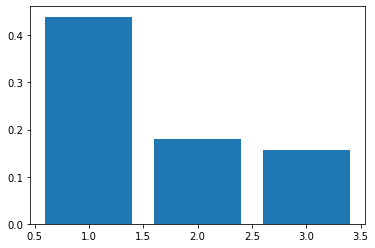

In [111]:
var = pca.explained_variance_ratio_
var
plt.bar(range(1,len(var)+1),var)

In [112]:
var

array([0.43961362, 0.17897274, 0.15692774])

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [114]:
x_train,x_test,y_train,y_test=train_test_split(finalDf.iloc[:,:3],finalDf["Class"],test_size=0.2)

In [115]:
x_test

,PC1,PC2,PC3
0,-0.776282,-0.251601,0.097381
169,0.918470,-0.365613,0.123463
247,0.451710,-0.276899,0.051467
83,-0.580416,-0.429506,0.678682
134,-0.051033,0.136224,-0.575588
166,0.637253,0.828860,0.370102
213,0.462505,-0.525029,0.492830
188,0.689682,-0.375712,0.410998
225,1.021035,-0.515479,0.025909
85,-0.751805,-0.156150,-0.333461


In [116]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [117]:
# know how much information is there in the new pca features
y_test_pred=model.predict(x_test)

In [118]:
accuracy_score(y_test_pred,y_test) # 96 percent of information present in the new pca features

1.0

In [119]:
PCA_data = [["PC1", 0.43961362], ["PC2", 0.17897274], ["PC3", 0.15692774]]
dataframe_2 = pd.DataFrame(PCA_data, columns = ['PCA_Features', 'PCA_Score'])

In [120]:
dataframe_2

,PCA_Features,PCA_Score
0,PC1,0.439614
1,PC2,0.178973
2,PC3,0.156928


## Build the model

In [121]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac

In [122]:
df.drop(["Indstrial_Risk"],axis=1,inplace=True)

In [123]:
df.drop(["Management_Risk"],axis=1,inplace=True)
df.drop(["Operating_Risk"],axis=1,inplace=True)

In [124]:
df.head()

,Financial_Flexibility,Credibility,Competitive,Class
0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.5,0.0,0
4,0.0,0.0,0.0,0


In [125]:
df.tail()

,Financial_Flexibility,Credibility,Competitive,Class
245,1.0,1.0,1.0,1
246,0.5,1.0,1.0,1
247,1.0,0.5,0.5,1
248,0.5,1.0,0.5,1
249,0.5,0.5,1.0,1


In [126]:
x=df.iloc[:,0:3]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [190]:
y_test_pred=lr.predict(x_test)

In [128]:
lr.predict(x_test)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0])

In [129]:
ac(y_test_pred,y_test)

0.98

In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.97      0.99        34

    accuracy                           0.98        50
   macro avg       0.97      0.99      0.98        50
weighted avg       0.98      0.98      0.98        50



In [187]:

with open('df.pkl','wb') as f:
    pickle.dump(lr,f)
lr_model = pickle.load(open('df.pkl','rb'))

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [132]:
x = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [134]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [135]:
y_pred_classifier=classifier.predict(x_test)

In [136]:
classifier.predict(x_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0])

In [137]:
ac(y_pred_classifier,y_test)

0.9866666666666667

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_classifier,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [139]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [140]:
x = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [142]:
classifier1 = BaggingClassifier()
classifier1.fit(x_train,y_train)

BaggingClassifier()

In [143]:
y_pred_bagging = classifier1.predict(x_test)

In [144]:
classifier1.predict(x_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0])

In [145]:
ac(y_pred_bagging,y_test)

0.9866666666666667

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_bagging,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [147]:
# SVM Classification
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [148]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:3],df["Class"],test_size=0.2)

In [149]:
clf = SVC(kernel="linear",gamma=0.0001) #rbf or linear

clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

confusion_matrix(y_test, y_pred)

Accuracy = 100.0


array([[20,  0],
       [ 0, 30]], dtype=int64)

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [153]:
x = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [154]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [155]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=4,min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [156]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

0    25
1    25
dtype: int64

In [157]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.98

In [158]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3,)

In [159]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [160]:
#Prediction and computing the accuracy
preds=model.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.98

In [161]:
# Naive Base Classifer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [162]:
df.columns

Index(['Financial_Flexibility', 'Credibility', 'Competitive', 'Class'], dtype='object')

In [163]:
data_x=df[[col for col in df.columns if col!="Class"]]
data_y=df["Class"]

In [164]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y,test_size=0.3, shuffle=True) 



In [165]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,shuffle=True)

In [166]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
model=GaussianNB()
model=model.fit(x_train,y_train)

In [167]:
y_test_pred=model.predict(x_test)

In [168]:
metrics.accuracy_score(y_test,y_test_pred)

0.98

In [169]:
# adaboost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

filename = 'bankruptcy-prevention.csv'
names = [ 'Indstrial_Risk','Management_Risk','Financial_Flexibility',
       'Credibility', 'Competitive','Operating_Risk''Class']
      
dataframe = read_csv(filename,sep=";")
dataframe[" class"]=preprocessing.LabelEncoder().fit_transform(dataframe[" class"])
array = dataframe.values

X = array[:,2:5]
Y = array[:,-1]
num_trees = 100
max_features = 3
seed=7
kfold = KFold(n_splits=10)

model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.8,random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.992


In [170]:
# stacking ensemble Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

filename = 'bankruptcy-prevention.csv'
names = [ 'Indstrial_Risk','Management_Risk','Financial_Flexibility',
       'Credibility', 'Competitive','Operating_Risk''Class']
      
dataframe = read_csv(filename,sep=";")
dataframe[" class"]=preprocessing.LabelEncoder().fit_transform(dataframe[" class"])
array = dataframe.values

X = array[:,2:5]
Y = array[:,-1]
num_trees = 100
max_features = 3
seed=7
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9879999999999999


In [171]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

filename = 'bankruptcy-prevention.csv'
names = [ 'Indstrial_Risk','Management_Risk','Financial_Flexibility',
       'Credibility', 'Competitive','Operating_Risk''Class']
      
dataframe = read_csv(filename,sep=";")
dataframe[" class"]=preprocessing.LabelEncoder().fit_transform(dataframe[" class"])
array = dataframe.values

X = array[:,2:5]
Y = array[:,-1]
num_trees = 100
max_features = 3
seed=7
kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9960000000000001


In [172]:
raw_data2= {"Cross_val": ["Ada_Boost","Random_Forest","Bagging","Voting_Classifier"],
            "Accuracy": [0.992,0.992,0.992,0.992,]}
dataframe2 = pd.DataFrame(raw_data2,columns =["Cross_val","Accuracy"])

In [173]:
dataframe2

,Cross_val,Accuracy
0,Ada_Boost,0.992
1,Random_Forest,0.992
2,Bagging,0.992
3,Voting_Classifier,0.992


In [188]:
raw_data1= {"Classification": ["Logistic_Regression","Random_Forest","Bagging","Naive Bayes","Decision_tree","SVM"],
            "Accuracy": [0.98,0.98,0.98,0.98,0.98,0.98]}
dataframe1 = pd.DataFrame(raw_data,columns =["Classification","Accuracy"])

In [189]:
dataframe1

,Classification,Accuracy


In [177]:
data = [{'Logistic': 1, 'Random_Forest': 1, 'Bagging':1},
        {'Logistic': 0, 'Random_Forest': 0, 'Bagging':0},
        {'Logistic': 1, 'Random_Forest': 1, 'Bagging':1},
        {'Logistic': 0, 'Random_Forest': 0, 'Bagging':0},
        {'Logistic': 0, 'Random_Forest': 0, 'Bagging':0},
        {'Logistic': 1, 'Random_Forest': 1, 'Bagging':1},
        {'Logistic': 1, 'Random_Forest': 1, 'Bagging':1},
        {'Logistic': 0, 'Random_Forest': 0, 'Bagging':0},
        {'Logistic': 0, 'Random_Forest': 0, 'Bagging':0},
        {'Logistic': 0, 'Random_Forest': 0, 'Bagging':0}]

In [178]:
df1 = pd.DataFrame(data,
                  columns = ['Logistic', 'Random_Forest','Bagging'])

In [179]:
df1

,Logistic,Random_Forest,Bagging
0,1,1,1
1,0,0,0
2,1,1,1
3,0,0,0
4,0,0,0
5,1,1,1
6,1,1,1
7,0,0,0
8,0,0,0
9,0,0,0


In [15]:
raw_data1= {"Classification": ["Logistic_Regression","Random_Forest","Bagging","Naive Bayes","Decision_tree","SVM"],
            "Accuracy": [0.98,0.98,0.98,0.98,0.98,0.98]}
dataframe1 = pd.DataFrame(raw_data1,columns =["Classification","Accuracy"])

In [16]:
dataframe1frame1

,Classification,Accuracy
0,Logistic_Regression,0.98
1,Random_Forest,0.98
2,Bagging,0.98
3,Naive Bayes,0.98
4,Decision_tree,0.98
5,SVM,0.98


In [17]:
raw_data2= {"Cross_val": ["Ada_Boost","Random_Forest","Bagging","Voting_Classifier"],
            "Accuracy": [0.992,0.992,0.992,0.992,]}
dataframe2 = pd.DataFrame(raw_data2,columns =["Cross_val","Accuracy"])

In [18]:
dataframe2

,Cross_val,Accuracy
0,Ada_Boost,0.992
1,Random_Forest,0.992
2,Bagging,0.992
3,Voting_Classifier,0.992
